Titanic

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
%matplotlib inline
from graphviz  import Source
from IPython.display import SVG, display, HTML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>" 

In [293]:
titanic_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [294]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [295]:
#сколько пропущенных значений
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [296]:
#исключим колонки с большим количеством na
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)

In [297]:
y=titanic_data.Survived

In [298]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [299]:
#измеянем на числовые 
X=pd.get_dummies(X)

In [300]:
#заменяем na значения
X = X.fillna({'Age': X.Age.median()})

In [301]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


In [302]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [303]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

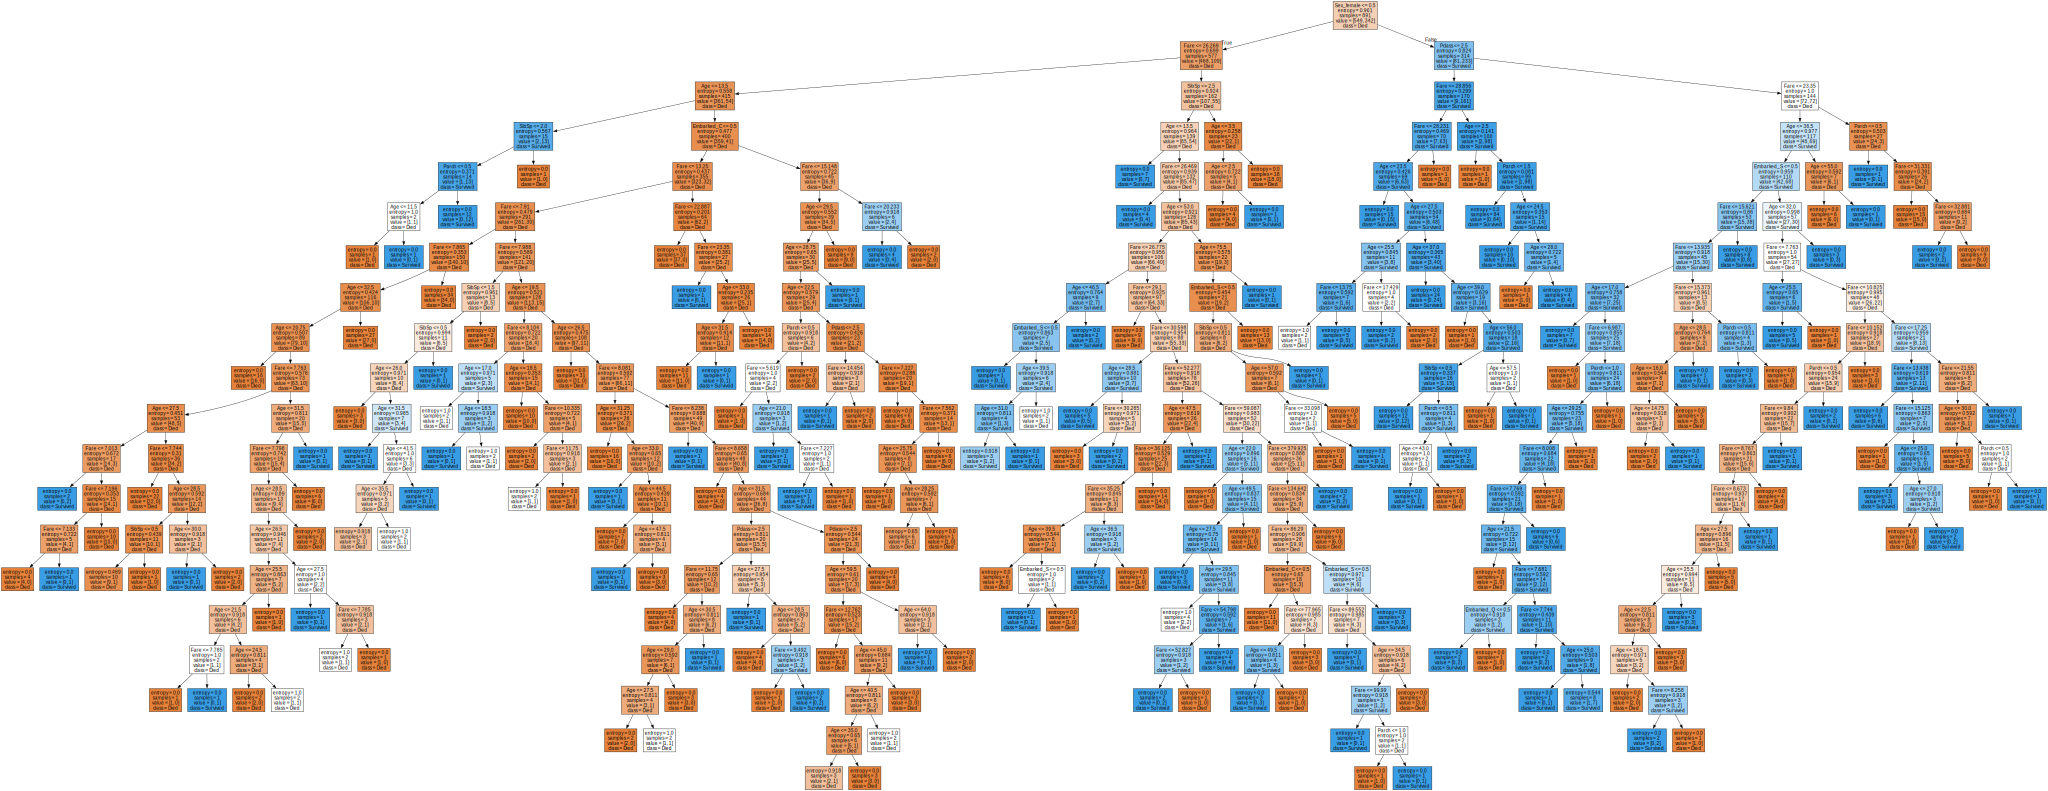

In [307]:

graph = Source(tree.export_graphviz(clf,
                                   out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled=True))
display(SVG(graph.pipe(format='svg')))

In [182]:
#делаем обучающие модельки
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [183]:
X_train.shape

(596, 10)

In [184]:
X_test.shape

(295, 10)

In [185]:
clf.score(X,y)

0.9797979797979798

In [186]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [187]:
clf.score(X_train,y_train)

0.9798657718120806

In [188]:
clf.score(X_test,y_test)

0.7728813559322034

In [189]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3, min_samples_split=100)

In [190]:
#попытемся сделать менее переобученный вид, 
#посмотрим какой у нас график:

In [191]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)

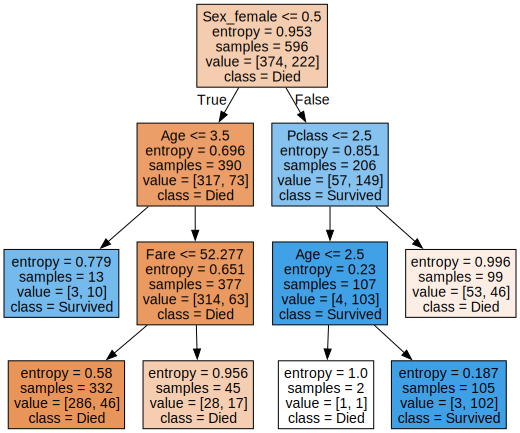

In [192]:
graph = Source(tree.export_graphviz(clf,
                                   out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled=True))
display(SVG(graph.pipe(format='svg')))

In [193]:
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [194]:
# Задаем модель
model = DecisionTreeClassifier()

In [195]:
# Задаем диапазоны значений для параметров
param_grid = {
    'max_depth': range(1, 15),
    'min_samples_split': range(2, 300, 5),
    'min_samples_leaf': range(2, 300, 10)
}

In [196]:
# Создаем объект GridSearchCV
grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

In [197]:
# Обучаем модель на данных
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 15),
                         'min_samples_leaf': range(2, 300, 10),
                         'min_samples_split': range(2, 300, 5)},
             scoring='accuracy')

In [198]:
# Выводим лучшие параметры и оценку качества модели
print("Лучшие параметры:", grid_search.best_params_)
print("Оценка качества модели:", grid_search.best_score_)

Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 37}
Оценка качества модели: 0.8154901960784313


In [199]:
# Получаем результаты подбора параметров
results = grid_search.cv_results_

In [200]:
# Извлекаем значения параметров
params = results['params']

In [201]:
# Создаем список значений параметров для каждого набора
max_depths = grid_search.best_params_['max_depth']
min_samples_split = grid_search.best_params_['min_samples_split']
min_samples_leaf = grid_search.best_params_['min_samples_leaf']

In [202]:
# Обучаем классификатор на подобранных параметрах
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depths, \
                                min_samples_split=min_samples_split, \
                                min_samples_leaf=min_samples_leaf)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                       min_samples_split=37)

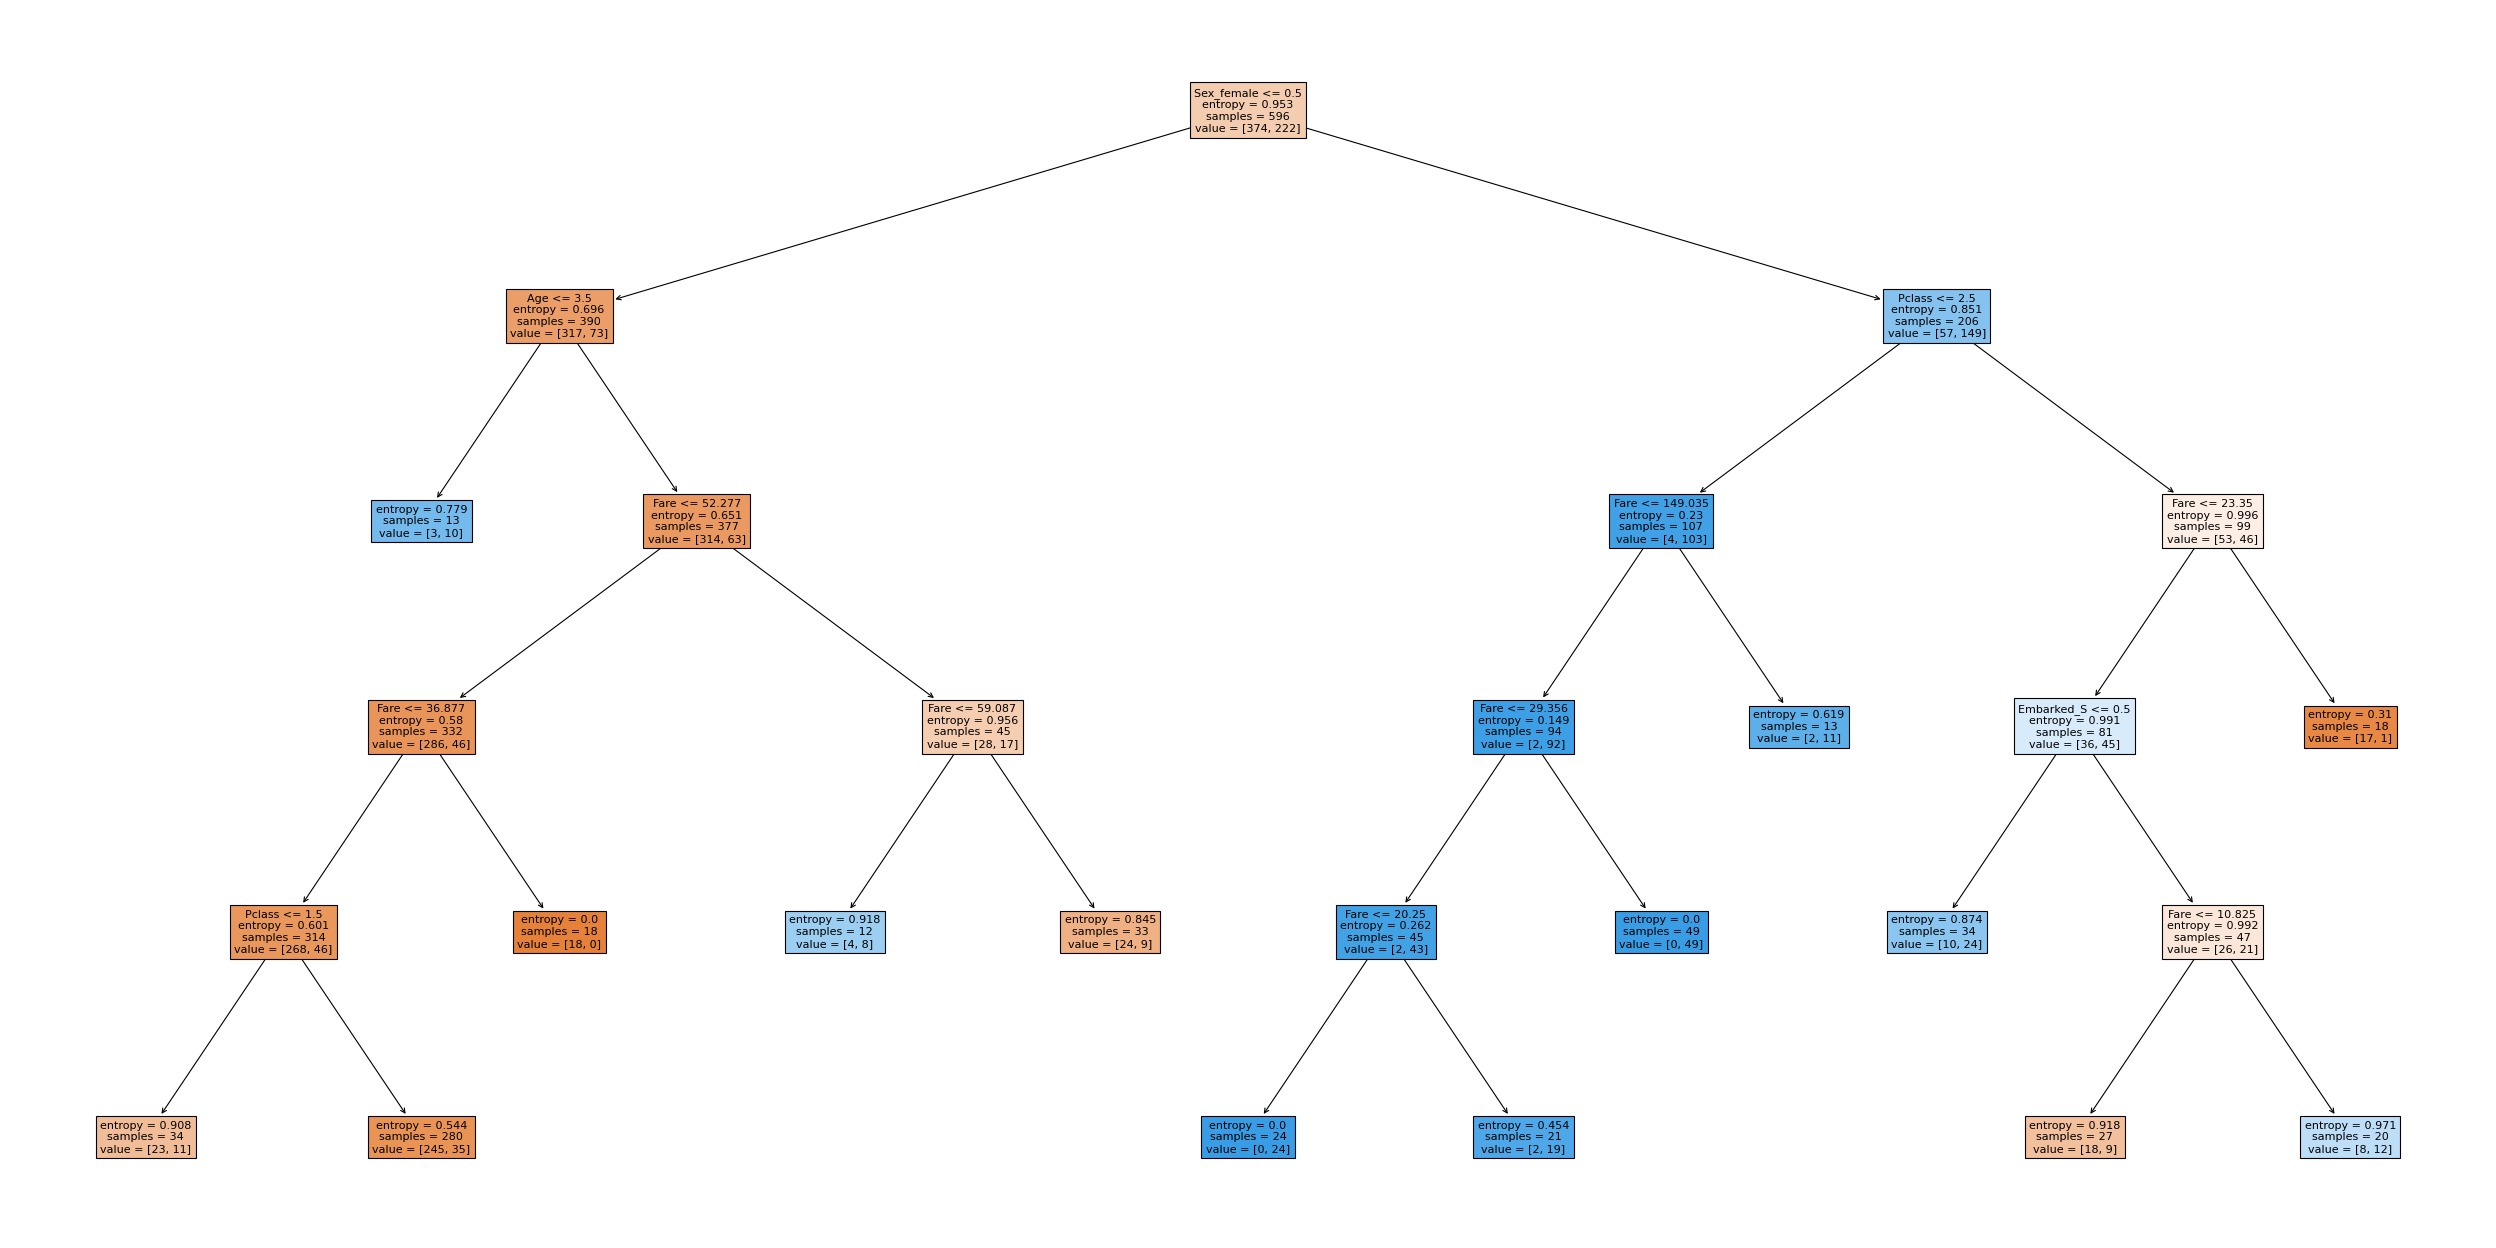

In [203]:
# Визуализируем
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=10,filled=True,feature_names=list(X))

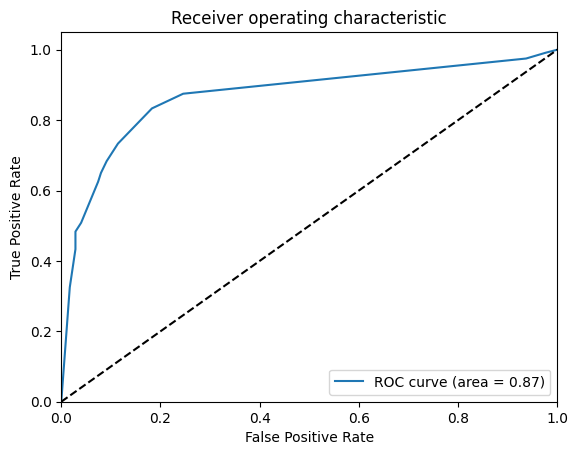

In [204]:
# Строим ROC-кривую
y_pred = clf.predict(X_test)
y_predicted_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1] , 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [205]:
# Выводим значения precision и recall
y_pred = np.where(y_predicted_prob[:, 1] > 0.5, 1, 0)
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

0.8367346938775511
0.6833333333333333


In [206]:
#случайные деревья

In [207]:
from sklearn.ensemble import RandomForestClassifier

In [208]:
clf_rf = RandomForestClassifier()

In [209]:
parameters={'n_estimators': [10, 20, 30], 'max_depth':[2, 5, 7, 10]}

In [210]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [211]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [212]:
grid_search_cv_clf.best_params_

{'max_depth': 10, 'n_estimators': 30}

In [213]:
best_clf = grid_search_cv_clf.best_estimator_

In [214]:
best_clf.score(X_test, y_test)

0.7932203389830509

In [215]:
feature_importances = best_clf.feature_importances_

In [216]:
feature_importances_df=pd.DataFrame({'features':list(X_train), 
                                     'feature_importances':feature_importances})

In [217]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,Fare,0.236126
1,Age,0.208139
6,Sex_male,0.202105
0,Pclass,0.106621
5,Sex_female,0.103399
2,SibSp,0.050883
3,Parch,0.044519
9,Embarked_S,0.024033
7,Embarked_C,0.018542
8,Embarked_Q,0.005633


In [218]:
max_depth_values=range(1,100)

In [219]:
scores_data=pd.DataFrame()

In [220]:
#находим значения тестовой и трейн выборки
for max_depth in max_depth_values:
    clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)

    mean_score_val_score = cross_val_score(clf,X_train, y_train, cv=5).mean()

    temp_score_data=pd.DataFrame({'max_depth':[max_depth],
                              'train_score':[train_score],
                              'test_score':[test_score],
                              'cross_val_score':[mean_score_val_score]})
    scores_data=scores_data._append(temp_score_data)

In [221]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.795350


In [222]:
#как поменять колонки, сделать тесты в одной колонке
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score','test_score','cross_val_score'],
                          var_name='set_type', value_name='score')

In [223]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.771863
293,96,cross_val_score,0.760098
294,97,cross_val_score,0.763459
295,98,cross_val_score,0.765140


In [224]:
scores_data_long.query("set_type=='cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.795350
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.805406
206,9,cross_val_score,0.788599
207,10,cross_val_score,0.802031


/Users/polina/Library/Python/3.11/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/polina/Library/Python/3.11/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/polina/Library/Python/3.11/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='max_depth', ylabel='score'>

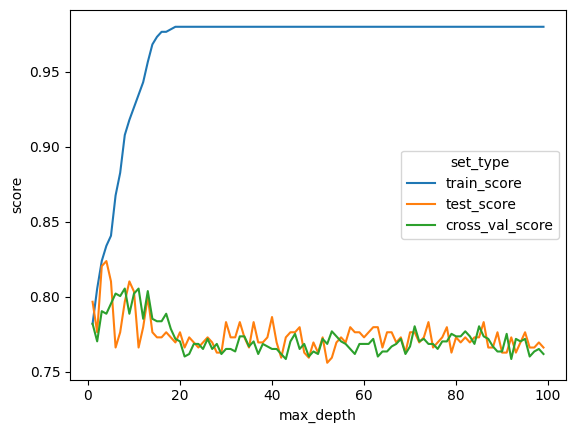

In [225]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')

In [226]:
#кроссвалидация
from sklearn.model_selection import cross_val_score

In [227]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [228]:
cross_val_score(clf,X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [229]:
cross_val_score(clf,X_train, y_train, cv=5).mean()

0.7886274509803922

In [230]:
#Лучшая кроссвалидация, с учетом, что она лучшая при макс =10, что мы нашли выше

In [231]:
best_clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [232]:
cross_val_score(best_clf,X_train, y_train, cv=5)

array([0.79166667, 0.83193277, 0.77310924, 0.80672269, 0.77310924])

In [233]:
cross_val_score(best_clf,X_train, y_train, cv=5).mean()

0.8037114845938376

In [234]:
from sklearn.model_selection import GridSearchCV

In [235]:
clf=tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [236]:
parameters = {'criterion': ['gini','entropy'], 'max_depth': range(1,30)}

In [237]:
grid_serch_cv_clf=GridSearchCV(clf, parameters, cv=5)
grid_serch_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [238]:
grid_serch_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [239]:
grid_serch_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [240]:
best_clf=grid_serch_cv_clf.best_estimator_

In [241]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [242]:
best_clf.score(X_test, y_test)

0.7898305084745763

In [243]:
from sklearn.metrics import precision_score, recall_score

In [244]:
y_pred = best_clf.predict(X_test)

In [245]:
precision_score(y_test, y_pred)

0.8020833333333334

In [246]:
recall_score(y_test, y_pred)

0.6416666666666667

In [247]:
y_predicted_prob=best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.8852459 , 0.1147541 ],
       [0.61538462, 0.38461538],
       [0.8852459 , 0.1147541 ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.8852459 , 0.1147541 ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.90196078, 0.09803922],
       [1.        , 0.        ],
       [0.8852459 , 0.1147541 ],
       [0.90196078, 0.09803922],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.69565217, 0.30434783],
       [0.8852459 , 0.1147541 ],
       [1.        , 0.        ],
       [0.8852459 , 0.1147541 ],
       [0.68      , 0.32      ],
       [0.69565217, 0.30434783],
       [0.8852459 , 0.1147541 ],
       [0.8852459 , 0.1147541 ],
       [1.        , 0.        ],
       [0.68      , 0.32      ],
       [0.61538462, 0.38461538],
       [1.        , 0.        ],
       [0.69565217, 0.30434783],
       [0.

<Axes: >

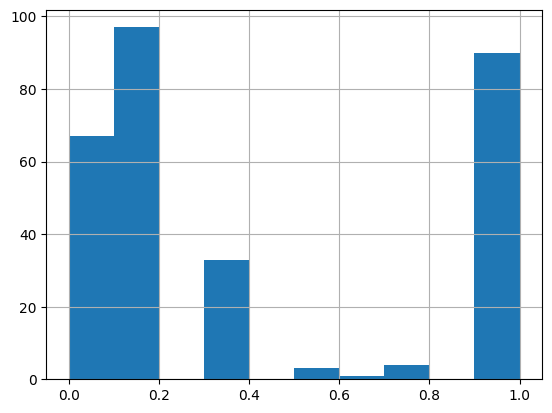

In [248]:
pd.Series(y_predicted_prob[:,1]).hist()

In [249]:
y_pred = np.where(y_predicted_prob[:,1]>0.8,1,0)

In [250]:
pd.Series(y_predicted_prob[:,1]).unique()

array([0.1147541 , 0.38461538, 1.        , 0.        , 0.75      ,
       0.09803922, 0.30434783, 0.32      , 0.5       , 0.16666667,
       0.6       , 0.66666667])

In [251]:
precision_score(y_test, y_pred)

0.8111111111111111

In [252]:
recall_score(y_test, y_pred)

0.6083333333333333

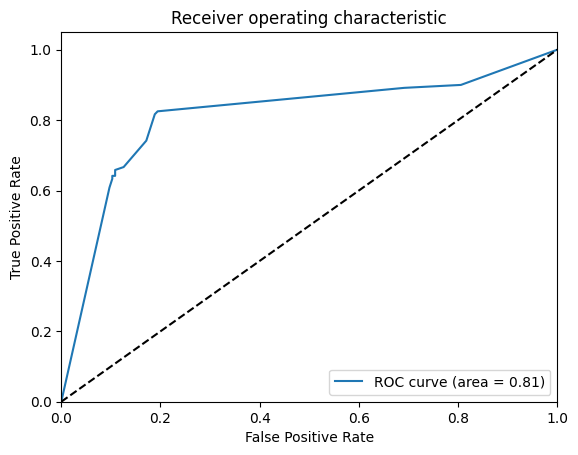

In [253]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1] , 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [254]:
#тренировка на ирисах
iris_train=pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)

In [255]:
iris_test=pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)

In [256]:
iris_train.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [257]:
iris_test.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [258]:
X_train=iris_train.drop('species',axis=1)
X_test=iris_test.drop('species',axis=1)

In [259]:
X_train.head()

,sepal length,sepal width,petal length,petal width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5


In [260]:
X_test.head()

,sepal length,sepal width,petal length,petal width
114,5.8,2.8,5.1,2.4
70,5.9,3.2,4.8,1.8
138,6.0,3.0,4.8,1.8
59,5.2,2.7,3.9,1.4
44,5.1,3.8,1.9,0.4


In [261]:
y_train=iris_train.species
y_test=iris_test.species

In [262]:
y_train.head()

130    2
7      0
11     0
142    2
109    2
Name: species, dtype: int64

In [263]:
y_test.head()

114    2
70     1
138    2
59     1
44     0
Name: species, dtype: int64

In [264]:
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [265]:
clf.score(X_train,y_train)

1.0

In [266]:
clf.score(X_test,y_test)

0.94

In [267]:
max_depth_values=range(1,100)

In [268]:
scores_data=pd.DataFrame()

In [269]:
for max_depth in max_depth_values:
    clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)

    mean_score_val_score = cross_val_score(clf,X_train, y_train, cv=5).mean()

    temp_score_data=pd.DataFrame({'max_depth':[max_depth],
                              'train_score':[train_score],
                              'test_score':[test_score],
                              'cross_val_score':[mean_score_val_score]})
    scores_data=scores_data._append(temp_score_data)

In [270]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.70,0.60,0.70
0,2,0.97,0.94,0.95
0,3,0.99,0.94,0.96
0,4,1.00,0.92,0.96
0,5,1.00,0.94,0.96


In [271]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score','test_score','cross_val_score'],
                          var_name='set_type', value_name='score')

In [272]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
292,95,cross_val_score,0.96
293,96,cross_val_score,0.96
294,97,cross_val_score,0.96
295,98,cross_val_score,0.96


In [273]:
best_clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [274]:
scores_data_long.query("set_type=='cross_val_score'").head(10)

,max_depth,set_type,score
198,1,cross_val_score,0.70
199,2,cross_val_score,0.95
200,3,cross_val_score,0.96
201,4,cross_val_score,0.96
202,5,cross_val_score,0.96
203,6,cross_val_score,0.96
204,7,cross_val_score,0.96
205,8,cross_val_score,0.96
206,9,cross_val_score,0.96
207,10,cross_val_score,0.96


In [275]:
cross_val_score(best_clf,X_train, y_train, cv=5).mean()

0.9600000000000002

/Users/polina/Library/Python/3.11/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/polina/Library/Python/3.11/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/polina/Library/Python/3.11/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='max_depth', ylabel='score'>

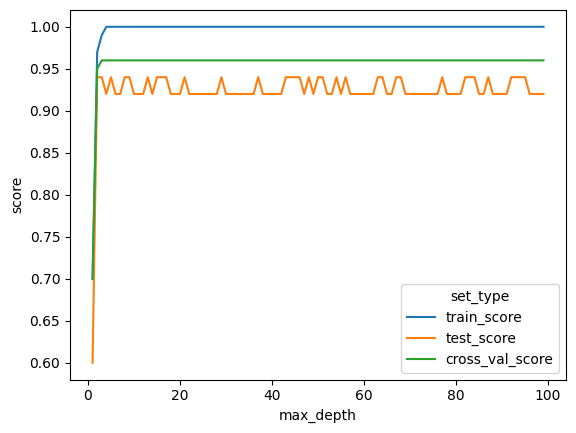

In [276]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')

In [277]:
#предсказание котиков и собак
pets_train=pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

In [278]:
pets_train

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [279]:
pets_train = pets_train.rename(columns={'Лазает по деревьям':'Лазает'})

In [280]:
X_train=pets_train.drop('Вид', axis=1)

In [281]:
y_train=pets_train.Вид

In [282]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [283]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

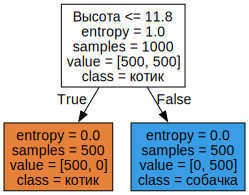

In [284]:
graph = Source(tree.export_graphviz(clf,
                                   out_file=None,
                                   feature_names=list(X_train),
                                   class_names=['котик', 'собачка'],
                                   filled=True))
display(SVG(graph.pipe(format='svg')))

In [285]:
pets_test=pd.read_json('/Users/polina/Downloads/dataset_209691_15.txt')


In [286]:
pets_test

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,30,36.0,1,1,0
1,25,30.0,1,1,0
2,22,26.4,1,1,0
3,34,40.8,1,1,0
4,19,22.8,1,1,0
...,...,...,...,...,...
95,6,2.4,1,0,1
96,6,2.4,1,1,1
97,13,5.2,1,0,1
98,9,3.6,1,0,1


In [287]:
pets_test = pets_test.rename(columns={'Лазает по деревьям':'Лазает'})

In [288]:
clf.predict(pets_test)

array(['собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
 

In [289]:
print((clf.predict(pets_test)=='собачка').sum())

41


In [290]:
print((clf.predict(pets_test)=='котик').sum())

59
